# FEATURES AND MEANING #

feature 	description

A1 	net profit / total assets

A2 	total liabilities / total assets

A3 	working capital / total assets

A4 	current assets / short-term liabilities

A5 	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

A6 	retained earnings / total assets

A7 	EBIT / total assets

A8 	book value of equity / total liabilities

A9 	sales / total assets

A10 	equity / total assets

A11 	(gross profit + extraordinary items + financial expenses) / total assets

A12 	gross profit / short-term liabilities

A13 	(gross profit + depreciation) / sales

A14 	(gross profit + interest) / total assets

A15 	(total liabilities * 365) / (gross profit + depreciation)

A16 	(gross profit + depreciation) / total liabilities

A17 	total assets / total liabilities

A18 	gross profit / total assets

A19 	gross profit / sales

A20 	(inventory * 365) / sales

A21 	sales (n) / sales (n-1)

A22 	profit on operating activities / total assets

A23 	net profit / sales

A24 	gross profit (in 3 years) / total assets

A25 	(equity - share capital) / total assets

A26 	(net profit + depreciation) / total liabilities

A27 	profit on operating activities / financial expenses

A28 	working capital / fixed assets

A29 	logarithm of total assets

A30 	(total liabilities - cash) / sales

A31 	(gross profit + interest) / sales

A32 	(current liabilities * 365) / cost of products sold

A33 	operating expenses / short-term liabilities

A34 	operating expenses / total liabilities

A35 	profit on sales / total assets

A36 	total sales / total assets

A37 	(current assets - inventories) / long-term liabilities

A38 	constant capital / total assets

A39 	profit on sales / sales

A40 	(current assets - inventory - receivables) / short-term liabilities

A41 	total liabilities / ((profit on operating activities + depreciation) * (12/365))

A42 	profit on operating activities / sales

A43 	rotation receivables + inventory turnover in days

A44 	(receivables * 365) / sales

A45 	net profit / inventory

A46 	(current assets - inventory) / short-term liabilities

A47 	(inventory * 365) / cost of products sold

A48 	EBITDA (profit on operating activities - depreciation) / total assets

A49 	EBITDA (profit on operating activities - depreciation) / sales

A50 	current assets / total liabilities

A51 	short-term liabilities / total assets

A52 	(short-term liabilities * 365) / cost of products sold)

A53 	equity / fixed assets

A54 	constant capital / fixed assets

55 	    working capital

A56 	(sales - cost of products sold) / sales

A57 	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)

A58 	total costs /total sales

A59 	long-term liabilities / equity

A60 	sales / inventory

A61 	sales / receivables

62 	    (short-term liabilities *365) / sales

A63 	sales / short-term liabilities

A64 	sales / fixed assets

CLASS 	Whether company goes bankrupt or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from ipywidgets import interact
import pickle 
import ipywidgets as widgets
#from teaching_tools.widgets import ConfusionMatrixWidget



**COLLECTING THE DATA**

In [2]:
df = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\bankruptcy in poland.csv')
df


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A57,A58,A59,A60,A61,A62,A63,A64,class,year
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0,1
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0,1
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0,1
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0,1
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1,5
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1,5
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1,5
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1,5


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      43397 non-null  float64
 1   A2      43397 non-null  float64
 2   A3      43397 non-null  float64
 3   A4      43271 non-null  float64
 4   A5      43316 non-null  float64
 5   A6      43397 non-null  float64
 6   A7      43397 non-null  float64
 7   A8      43311 non-null  float64
 8   A9      43396 non-null  float64
 9   A10     43397 non-null  float64
 10  A11     43361 non-null  float64
 11  A12     43271 non-null  float64
 12  A13     43278 non-null  float64
 13  A14     43397 non-null  float64
 14  A15     43369 non-null  float64
 15  A16     43310 non-null  float64
 16  A17     43311 non-null  float64
 17  A18     43397 non-null  float64
 18  A19     43277 non-null  float64
 19  A20     43278 non-null  float64
 20  A21     37551 non-null  float64
 21  A22     43397 non-null  float64
 22

# **EXPLORING** #

*WE CAN SEE THE POSITIVE CLASS(BANKRUPT COMPANY CLASS TAKE AS LOW AS 4% OF THE DATA) WHILE THE NEGATIVE CLASS(NO BANKRUPTCY) TAKES ABOUT 95% OF THE DATA*

In [4]:
negative_class, positive_class = df['class'].value_counts(normalize=True)
print('the negative class:', negative_class)
print('the positive class:', positive_class)


the negative class: 0.9518258265176823
the positive class: 0.04817417348231771


**MISSING VALUES**

<Axes: >

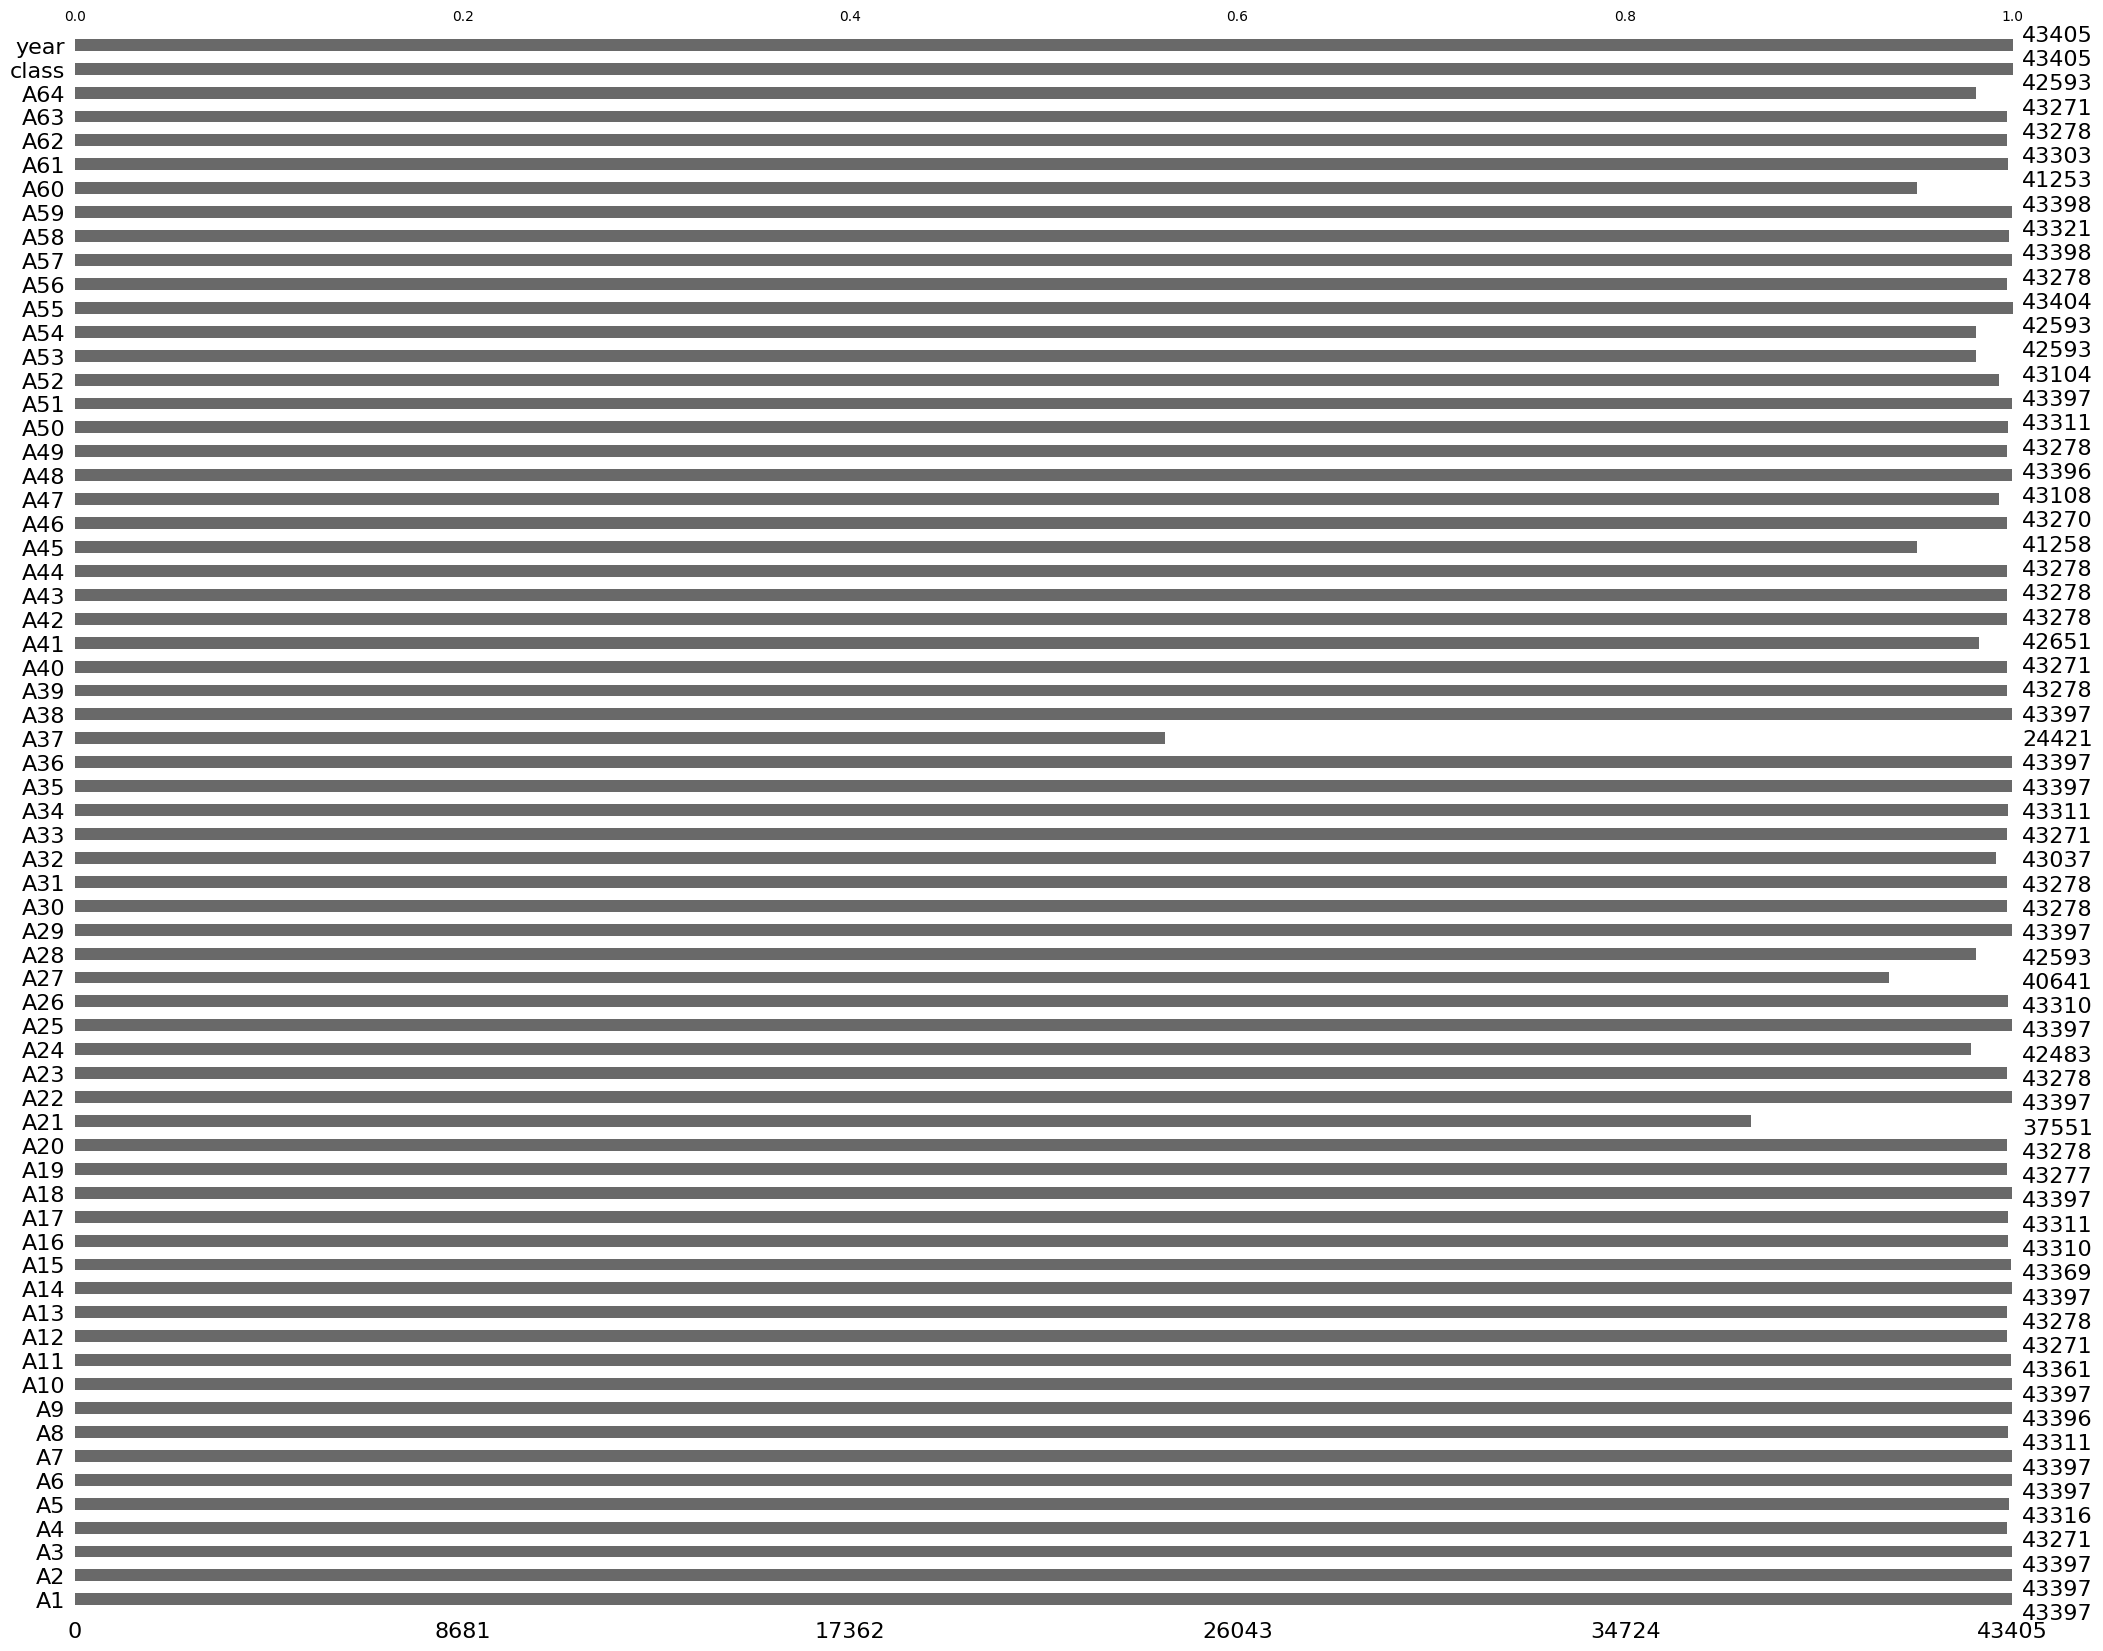

In [5]:
import missingno as msno
msno.bar(df)


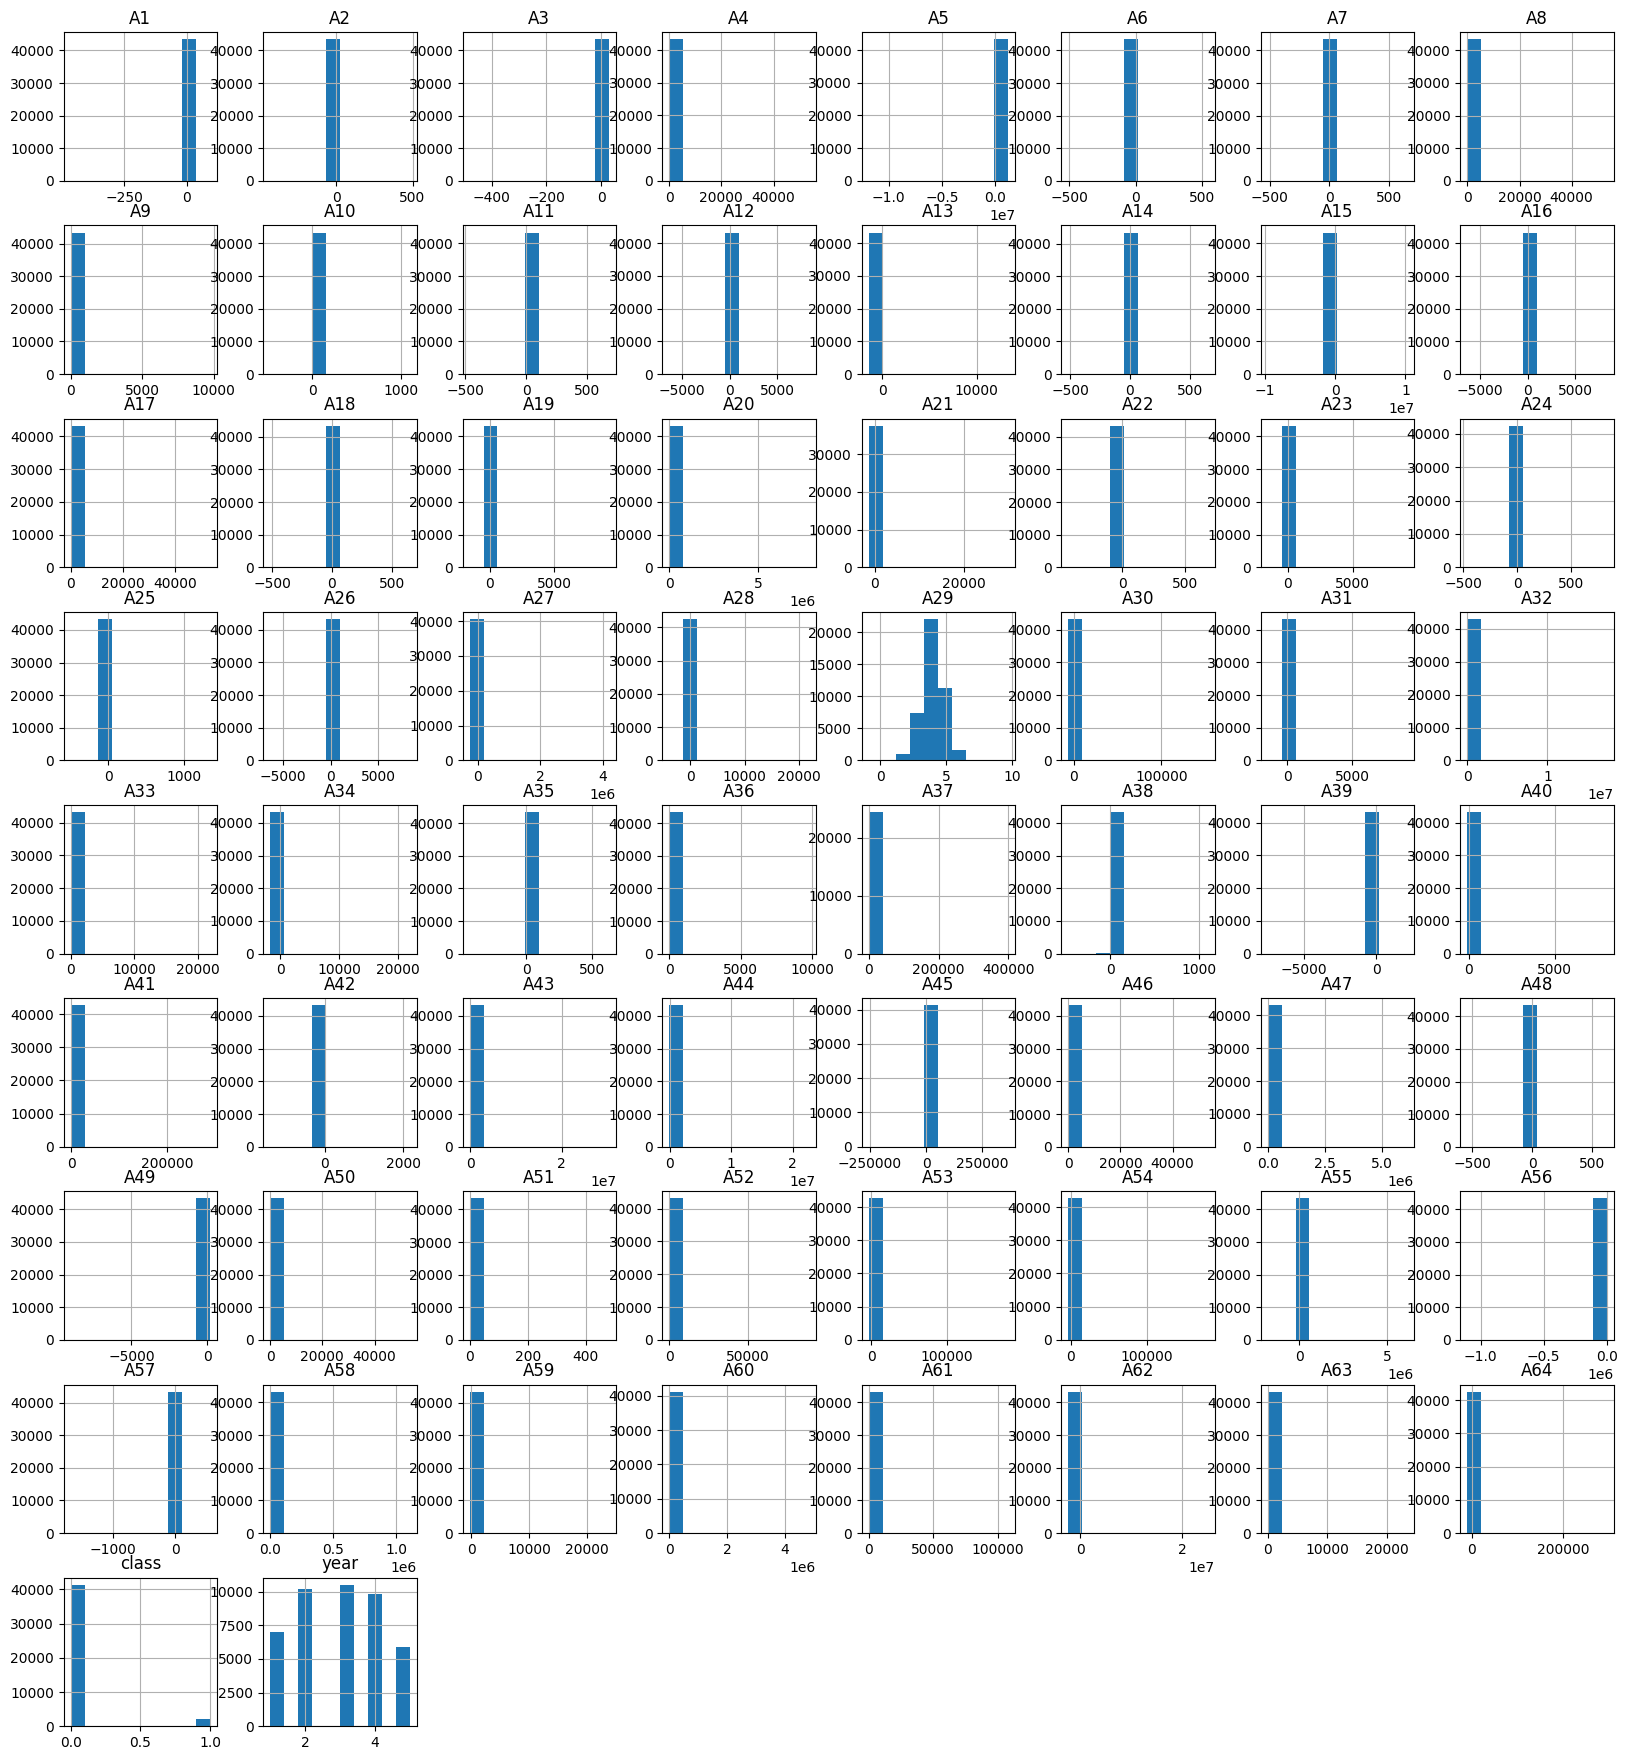

In [ ]:
df.hist(figsize=(20,22));


*CORRELATION MATRIX*

*WE CAN SEE A MULTI COLLINEARLITY IN THE DATA*

<Axes: >

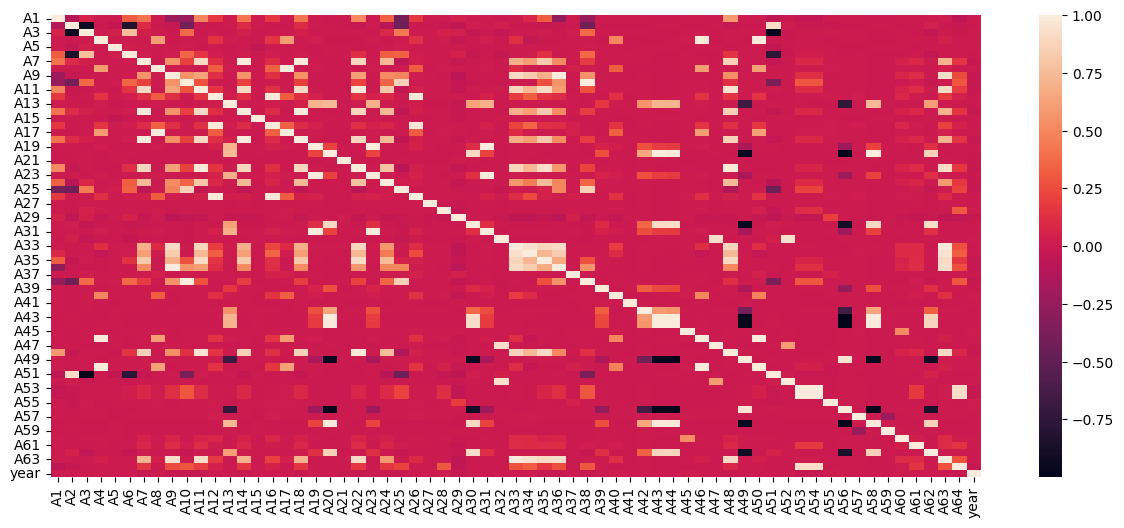

In [7]:
corr = df.drop(columns='class').corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr)


**STATISTICS OF THE DATA**

*A VERY IMBALANCED DATA...WE SAN SEE THAT THE STANDARD DEVIATION ARE MILES ABOVE THE MEAN AND THE MAX ARE MILES ABOVE THE MEAN*

In [6]:
df.describe()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A57,A58,A59,A60,A61,A62,A63,A64,class,year
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,0.048174,2.939753
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,0.214137,1.283975
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000,1.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,0.000000,2.000000
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,0.000000,3.000000
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200,0.000000,4.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000,5.000000


# SPLITTING THE DATA #

In [7]:
X = df.drop(columns=['class', 'year'], axis=1)
y = df['class']

print('the shape of X :', X.shape)
print('the shape of y :', y.shape)


the shape of X : (43405, 64)
the shape of y : (43405,)


*Divide the data (X and y) into training and test sets using a randomized train-test split. Your test set should be 20% of your total data*

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('the shape of X_train :',X_train.shape)
print('the shape of X_test :',X_test.shape)
print('the shape of y_train :',y_train.shape)
print('the shape of y_test :',y_test.shape)



the shape of X_train : (34724, 64)
the shape of X_test : (8681, 64)
the shape of y_train : (34724,)
the shape of y_test : (8681,)


# RESAMPLING TECHNIQUES #

*GIVEN THAT OUR DATA IS IMBALANCED (TOO MANY NEGATIVE BANKRUPTCY AND FEW POSITIVE BANKRUPTCY), WE WILL TAKE A RANDOM SAMPLER TO MAKE BOTH CLASS HAVE 
EQUAL NUMBER OF OBSERVATIONS CREATING BALANCE BETWEEN THE DATA*

*UNDERSAMPLING.... THIS RESAMPLING METHOD REMOVES THE BIGGER CLASS OF DATA UNTIL THE LOWER CLASS AND THE BIGGER CLASS HAVE THE SAME DATA POINTS*

*WE CAN SEE THE THE DATA HAS REDUCED FROM 34724 TO 3300 DATA OBSERVATIONS*

In [9]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print('the shape of X_train_under:', X_train_under.shape)
X_train_under.head()


the shape of X_train_under: (3300, 64)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
18536,-0.196780,0.725500,0.18188,3.0821,25.056,0.0,-0.238160,0.37837,0.65133,0.27450,...,4016.60,-0.330730,-0.716850,-0.42584,2.0455,5.1974,6.0054,48.952,7.4563,0.8913
42811,0.341250,0.110950,0.59612,6.7003,30.043,0.0,0.420400,8.01330,1.28400,0.88905,...,6654.70,0.331860,0.383830,0.67452,0.0000,2.4704,12.9360,29.729,12.2780,4.2898
30364,0.011582,0.824950,0.09303,1.1902,-24.185,0.0,0.011582,0.21219,1.69320,0.17505,...,1161.30,0.018158,0.066162,0.99328,1.6749,8.9392,4.4818,105.440,3.4618,4.0523
9978,0.547970,0.077456,0.66822,9.7478,464.280,0.0,0.678620,11.91000,1.34210,0.92254,...,796.30,0.597590,0.593980,0.50191,0.0000,NaN,11.0110,20.775,17.5690,5.2551
32936,-0.022274,0.657270,0.29107,1.7282,17.059,0.0,-0.022274,0.52144,1.32110,0.34273,...,262.05,-0.803580,-0.064990,1.00940,0.0000,7.4160,5.4275,110.440,3.3050,4.2729


*ANOTHER SAMPLING TECHNIQUE IS THE OVER SAMPLING METHOD......THIS METHOD ADDS DATA POINTS TO THE LOWER CLASS TILL IT MATCHES THE SAME NUMBER OF OBSERVATIONS AS THE BIGGER CLASS*

*WE CAN SEE THE OVER SAMPLER METTHOD INCREASED THE LOWER CLASS TILL IT MATCHED THE SAME NUMBER OF OBSERVATION AS THE BIGGER CLASS*

In [10]:
Over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = Over_sampler.fit_resample(X_train, y_train)
print('the shape of X_train_under:', X_train_over.shape)
X_train_over.head()


the shape of X_train_under: (66148, 64)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,-0.057539,0.44252,0.223210,1.57370,23.3010,0.161160,-0.055615,1.25980,0.94527,0.55748,...,8934.000,-0.057899,-0.10321,1.05790,0.095908,11.846,3.9378,101.98,3.5792,3.5914
1,-0.128080,0.85370,-0.025713,0.96909,-39.4380,-0.031407,-0.128080,0.17137,3.02940,0.14630,...,-1148.500,0.168690,-0.87547,0.85164,0.000000,14.730,5.2979,100.23,3.6416,15.6290
2,-0.104010,0.86107,0.059173,1.06870,1.8093,0.000000,-0.104010,0.16134,2.28140,0.13893,...,27.807,0.196490,-0.74866,0.80469,0.000000,45.658,2.6453,137.76,2.6495,28.6050
3,0.175230,0.76406,0.071079,1.09300,-26.2280,0.175230,0.212090,0.25730,1.05880,0.19660,...,679.300,0.055543,0.89134,0.94446,0.000000,10.222,3.4837,136.74,2.6693,12.3710
4,0.097003,0.69768,-0.129770,0.63575,-92.9040,0.116770,0.097003,0.42044,1.06030,0.29333,...,-3695.500,0.056866,0.33069,0.94313,1.163900,7.850,30.8920,100.27,3.6402,1.6766


**ACCURACY BASELINE**

In [11]:
Acc_baseline = y_train.value_counts(normalize=True).max()
print('The Accuracy Baseline is :', round(Acc_baseline, 4))


The Accuracy Baseline is : 0.9525


**ITERATING THROUGH THE DATA TO GET THE BEST MODEL TO FIT THE DATA WITH**

*WE CAN SEE THE ACCURACY SCORE OF THE OVER SAMPLING METHOD IS THE BEST BUT IT STILL HAVENT BEATING THE BASELINE...MORE WORK TO BE DONE*

In [12]:
model_reg = make_pipeline(
         SimpleImputer(strategy='median'),
         DecisionTreeClassifier(random_state=42)
)
# fitting the model
model_reg.fit(X_train, y_train)

#fitting the under sampler data
model_under = make_pipeline(
         SimpleImputer(strategy='median'),
         DecisionTreeClassifier(random_state=42)
)
# fitting the model
model_under.fit(X_train_under, y_train_under)

#fitting the over sampler data
model_over = make_pipeline(
         SimpleImputer(strategy='median'),
         DecisionTreeClassifier(random_state=42)
)
# fitting the model
model_over.fit(X_train_over, y_train_over)


# EVALUATION
for m in [model_reg, model_under, model_over]:
    acc_train  = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print('the accuracy score of the training set:', round(acc_train, 4))
    print('the accuracy score of the testing set:', round(acc_test, 4))


the accuracy score of the training set: 1.0
the accuracy score of the testing set: 0.9499
the accuracy score of the training set: 0.8096
the accuracy score of the testing set: 0.7879
the accuracy score of the training set: 1.0
the accuracy score of the testing set: 0.9521


**CONFUSION MATRIX DISPLAY**

*THIS SHOW.....*

*TRUE NEGATIVE(8039)----WHERE OUR MODEL CORRECTLY PREDICTED COMPANIES THAT WILL NOT GO BANKRUPT*

*TRUE POSITIVE(227)------WHERE OUR MODEL PREDICTED COMPANIES THAT WILL GO BANKRUPT*

*FALSE POSITIVE(202)-------WHERE OUR MODEL PREDICTED COMPANIES TO GO BANKRUPT BUT ITS INCORRECT(THE OPPOSITE)*

*FALSE NEGATIVE(214)-------WHERE OUR MODEL PREDICTED COMPANIES NOT TO GO BANKRUPT BUT ITS INCORRECT(THE OPPOSITE)*

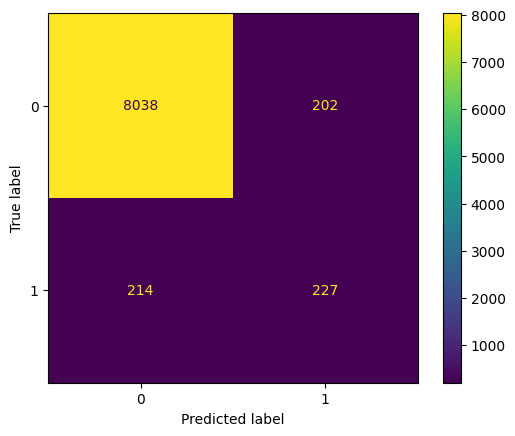

In [13]:
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test)


# DECISION TREE #

In [14]:
depth = model_over.named_steps['decisiontreeclassifier'].get_depth()
print('the depth of the tree is:', depth)


the depth of the tree is: 48


# COMMUNICATION PHASE #
*THIS SHOWS THE FEATURES THAT ARE IMPORTANT IN THE MODELS PREDICTION IN DETERMINING THE COMPANIES THAT WILL GO BANKRUPT OR NOT*


<Axes: >

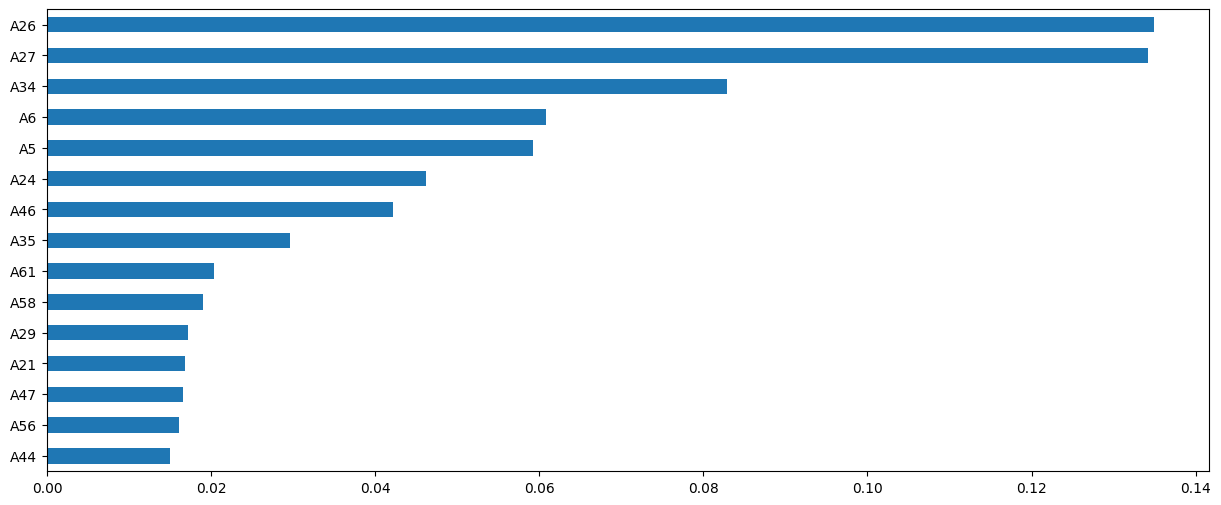

In [16]:
features = X_train_over.columns
importance = model_over.named_steps['decisiontreeclassifier'].feature_importances_

feat_imp = pd.Series(importance, index=features).sort_values()

feat_imp.tail(15).plot(figsize=(15, 6),kind='barh')


# RANDOM FOREST CLASSIFIER #
*So far, we've built single models that predict a single outcome. That's definitely a useful way to predict the future, but what if the one model we built isn't the right one? If we could somehow use more than one model simultaneously, we'd have a more trustworthy prediction*

*Ensemble models work by building multiple models on random subsets of the same data, and then comparing their predictions to make a final prediction, we're going to create an ensemble of trees here. This type of model is called a random forest*


*THIS RANDOM FOREST CLASSIFIER IS A GROUP OF MULTIPLE DECISION TREES......ITS LIKE WHEN YOU PUT TOGETHWR MULTIPLE MODELS INTO A SINGLE PREDICTOR THAT IS CALLED AN ENSEMBLE MODEL*

*RANDOM FOREST USES A TECHNIQUE CALLED BAGGING WHERE IT FITS MULTIPLE MODELS ON RANDOM SUBSETS OF THE DATA AND THEN CREATES FOREST OF DECISION TREES THEN WHEN ITS TIME FOR PREDICTION*
*EACH GROUP OF TREE WILL CAST THEIR OWN PREDICTION ANF THE MOST CLASS WILL BECOME THE PREDICTOR*

**By default, the number of trees in our forest (n_estimators) is set to 100. That means when we train this classifier, we'll be fitting 100 trees. While it will take longer to train, it will hopefully lead to better performance*


In [17]:
# initiating the model
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)

print(clf)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


#   VALIDATION #

*CROSS VALIDATION SCORE ...IF ALL OUR SCORES ARE CLOSER TO EACH OTHER IT MEANS OUR MODEL WILL BE ABLE TP GENERALIZE...CROSS_VALIDATION IS LIKE TRAINING OUR MODEL ON DIFFERENT SUBSET OF THE DATA*

*That took kind of a long time, but we just trained 500 random forest classifiers (100 jobs x 5 folds).*

*In order to get the best performance from our model, we need to tune its hyperparameter. But how can we do this if we haven't created a validation set? The answer is cross-validation. So, before we look at hyperparameters, let's see how cross-validation works with the classifier we just buil*

*AS WE CAN SEE OUR CR_SCORE WORKED WELL WHICH MEANS OUR MODEL WILL BE ABLE TO GENERALIZE WELL ON UNSEEN DATA*

In [18]:
cross_acc_score = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cross_acc_score)


[0.99818594 0.99780801 0.99697657 0.99848817 0.99712752]


*PARAMS_GRID.....FOR HYPERPARAMETER TUNNING*

In [19]:
params= {'simpleimputer__strategy':['mean', 'median'],
         'randomforestclassifier__n_estimators':range(25, 100, 25),  # SHOULD RUN ONLY N_ESTIMATOR IF I DIDNT USE MAKE_PIPELINE(REMOVE_RANDOMFORESTCLASSIFIER)
         'randomforestclassifier__max_depth': range(10, 50, 10)
}
params


{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

# GRID SEARCH CV #

*THE WAY IT WORKS IS....IT WILL TRAIN THE DATA ON EACH DEPTH RANGE, ESTIMATIOR AND IMPUTATION STRATEGY AND SAVE THE RESULT. IT WILL KEEP REPEATING THIS PROCESS TILL ALL THE PARAMETERS HAVE BEEN EXHAUSTED AND THEN IT EVALUATES THE BEST PARAMTERS WITH THE BEST ACCURACY SCORE*

In [20]:
model = GridSearchCV(
      clf,
      param_grid=params,
      cv=5,
      n_jobs=-1,   # to workmore faster
      verbose=1   # to show how the modelis operating
)
model


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

*FITTING THE MODEL AFTER GIVEN IT ALL THE PARAMETERS NEEDED FOR THE MODEL*

In [21]:
model.fit(X_train_over, y_train_over)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [24]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,19.045867,0.297924,0.194576,0.030292,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.949887,0.947090,0.952986,0.949278,0.948144,0.949477,0.002000,21
1,20.463432,0.623326,0.195868,0.030700,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.941950,0.940665,0.945805,0.942550,0.939376,0.942069,0.002165,24
2,39.202677,0.839666,0.367425,0.055541,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.952457,0.950038,0.953137,0.950110,0.948825,0.950913,0.001619,20
3,40.657112,0.433250,0.302430,0.040634,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.947317,0.945503,0.949433,0.944289,0.944667,0.946242,0.001907,23
4,60.026313,1.074336,0.431978,0.032634,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.953893,0.950718,0.955631,0.951924,0.949656,0.952364,0.002156,19


# EXTRACTING THE BEST HYPER PARAMETERS #

*THE BEST PARAMETER IS MAX_DEPT OF 40, ESTIMATOR OF 50 AND MEAN STRATEGY*

In [25]:
model.best_params_


{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

*A MASK FOR CV_RESULTS FOR ROWS WHERE PARAM_RANDOMFORESTCLASSIFIER MAX_DEPTH IS EQUALS TO 40*

Text(0.5, 1.0, 'Time of fitting vs No of estimators(MAX_DEPTH=40)')

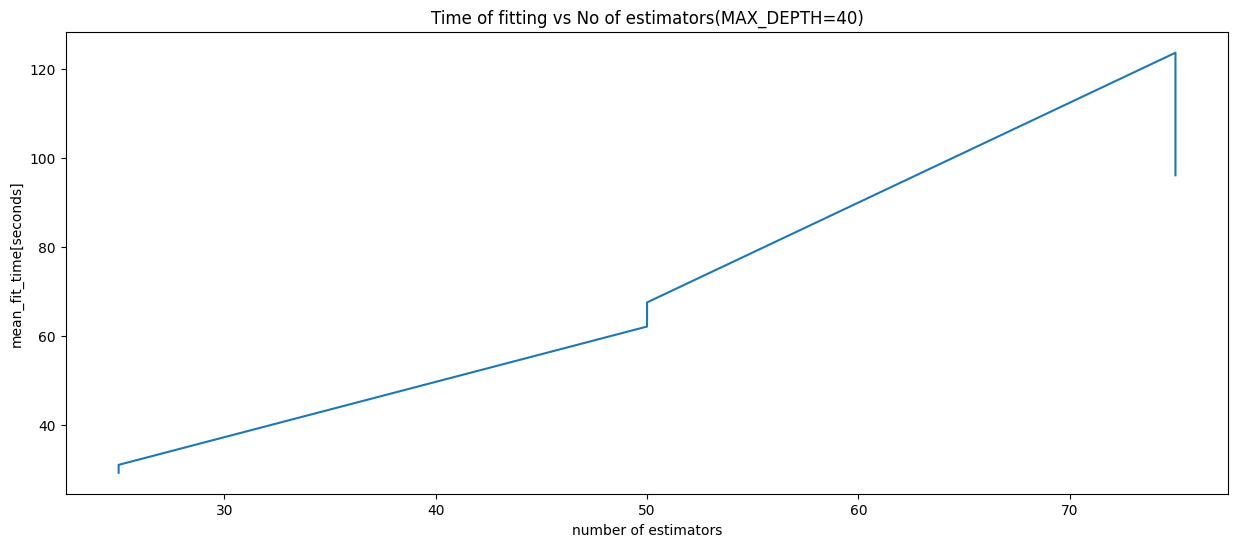

In [27]:
mask = cv_results['param_randomforestclassifier__max_depth']==40
cv_results[mask]

plt.figure(figsize=(15, 6))
plt.plot(      
cv_results[mask]['param_randomforestclassifier__n_estimators'],
cv_results[mask]['mean_fit_time']
)

plt.xlabel('number of estimators')
plt.ylabel('mean_fit_time[seconds]')
plt.title('Time of fitting vs No of estimators(MAX_DEPTH=40)')



*A MASK FOR CV_RESULTS FOR ROWS WHERE 'PARAM_RANDOMFORESTCLASSIFIER_N_ESTIMATOES IS EQUALS TO 50*

Text(0.5, 1.0, 'Time of fitting vs Number of estimators=50')

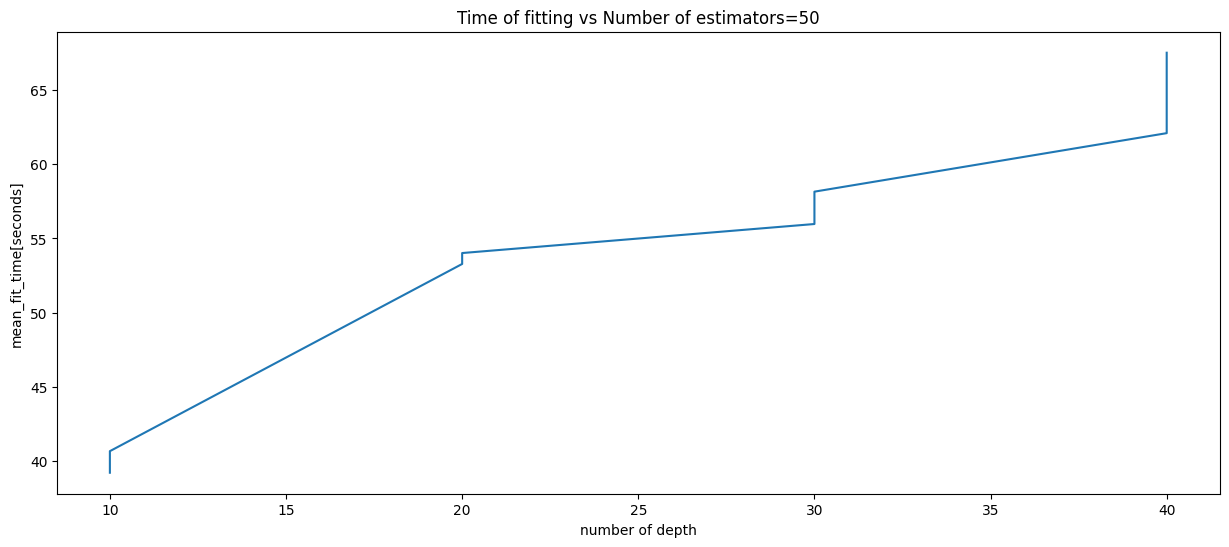

In [28]:
mask2 = cv_results['param_randomforestclassifier__n_estimators']==50
plt.figure(figsize=(15, 6))
plt.plot(
      cv_results[mask2]['param_randomforestclassifier__max_depth'],
      cv_results[mask2]['mean_fit_time']

)

plt.xlabel('number of depth')
plt.ylabel('mean_fit_time[seconds]')
plt.title('Time of fitting vs Number of estimators=50')


*CHECKING FOR THE BEST STRATEGY BETWEEN MEAN AND MEDIAN TO SEE THE ONE WITH MORE COMPUTATION TIME*

*THIS SHOWS MEDIAN TAKES MORE COMPUTATIONAL TIME WHEN FITTING THAN MEAN*

In [29]:
cv_results[['mean_fit_time','param_randomforestclassifier__max_depth','param_simpleimputer__strategy']].head(15)


,mean_fit_time,param_randomforestclassifier__max_depth,param_simpleimputer__strategy
0,19.045867,10,mean
1,20.463432,10,median
2,39.202677,10,mean
3,40.657112,10,median
4,60.026313,10,mean
5,62.633762,10,median
6,26.344961,20,mean
7,28.303671,20,median
8,53.281845,20,mean
9,54.018323,20,median


*ACCURACY SCORE OF THE BEST HYPER PARAMETER*

In [30]:
model.best_score_


0.9976870085516675

*WE BEAT THE BASELINE.....HURRAY*

In [31]:
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)

print('the training accuracy of the model is:', acc_train)
print('the testing accuracy of the model is :', acc_test)


the training accuracy of the model is: 1.0
the testing accuracy of the model is : 0.9653265752793457


*USING THE CONFUSION MATRIX TO EVALUATE THE MODEL PERFORMANCE*

In [32]:
y_test.value_counts()


class
0    8240
1     441
Name: count, dtype: int64

*DECISION TREE MODEL CONFUSION MATRIX*

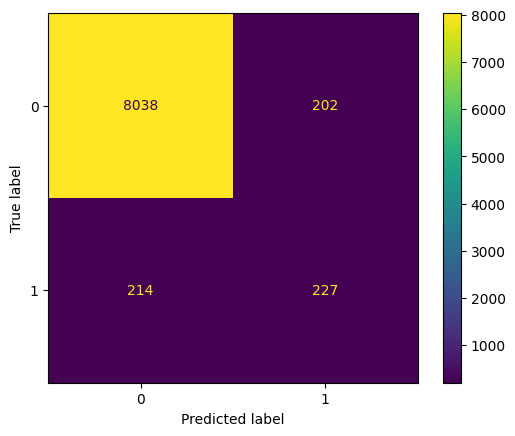

In [33]:
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test)


*RANDOM FOREST CLASSIFIER CONFUSION MATRIX*

*WE CAN SEE THE FALSE POSITIVE REDUCED FROM 202 TO 34 THAT SHOWS OUR MODEL IS MAKING MORE CORRECT PREDICTIONS AND THE FALSE NEGTIVE INCREASED FROM 214 TO 267, SHOWING MORE COMPANIES WENT BANKRUPT THAN THE DECISION TREES MODEL PREDICTED*

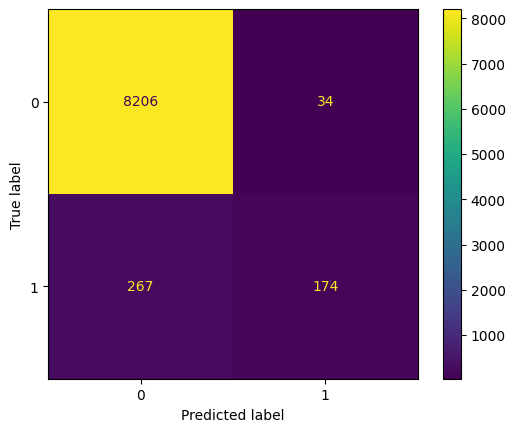

In [34]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


# CLASSIFICATION REPORT #

In [35]:
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8240
           1       0.84      0.39      0.54       441

    accuracy                           0.97      8681
   macro avg       0.90      0.70      0.76      8681
weighted avg       0.96      0.97      0.96      8681



*GETTING THE PROBABILITY PREDICTION FOR THE X_TEST

In [1]:
y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba[:50][:, -1])


NameError: name 'model' is not defined

**EXAMPLE OF WHERE PRECISION SHOULD BE USED**

*IN THIS CASE IF WE REDUCE THE THRESHOLD(0.3) THEREBY IMPROVING RECALL AND THEN MORE COMPNIES WITH LESS PERCENTAGE CHANCES OF GOING BANKRUPT WILL COME INTO THE PREDICTION OF FALSE POSITIVE BUT IF WE INCREASE THE PRECISION TO SAY ABOUT 0.7 THRESHOLD THERE WILL LESS FALSE POSITIVES, THEN THE COMPANIES THAT THE PREDICTOR WILL PREDICT AS TRUE POSITIVE HAVE A 70% CHANCE OF GOING BANKRUPT THEREBY THE PRIVATE EQUITY MAKE MILLIONS IN PROFIT*

**EXAMPLE OF WHERE RECALL(REDUCING THE THRESHOLD TO 0.2 - 0.4)**

*SAY YOU WORK FOR A BANKRUPTCY REGULATORY BOARD AND EACH TIME YOU SEND A MAIL TO COMPANIES THAT IS LIKELY TO GO BANKRUPT THE BOARD SPEND $300 FOR EACH MAIL SENT TO THE COMPANY SO AS TO ADVICE THEM TO FILE FOR BANKRUPTCY*

*BUT IF YOU DON'T SEND THE MAIL AND THE COMPANY END UP GOING BANKRUPT WITHOUT THE REGURATORY BOARD GIVING THEM NOTICE, THEY WILL END UP GOING TO LEGAL BATTLE WITH THE BOARD AND THE BOARD WILL SPEND CLOSE TO $100,000 IN EACH LEGAL BATTLE*

*NOW IN THIS CASE ITS BETTER TO SPEND $300 FOR EACH MAIL THAN $100K FOR LEGAL BATTLE....SO WE REDUCE THE THRESHOLD AND IMPROVE RECALL SO MORE COMPANY WITH LESS CHANCES OF GOING BANKRUPT ENDS UP IN THE FALSE POSITIVE LIST*

*I CREATED AN INTERACTIVE DASHBOARD SO THAT THE LOSSES AND PROFIT CAN BE SEEN WHEN THE THRESHOLD HAS BEEN CHANGED*

*For the second example, let's say we work at a private equity firm that purchases distressed businesses, improve them, and then sells them for a profit. You want to build a model to predict which companies will go bankrupt so that you can purchase them ahead of your competitors. If the firm purchases a company that is indeed insolvent, it can make a profit of €100 million or more. But if it purchases a company that isn't insolvent and can't be resold at a profit, the firm will lose €250 million.*

*For a model like this, we want to focus on precision. If we're trying to maximize our profit, the quality of our predictions is much more important than the quantity of our predictions. It's not a big deal if we don't catch every single insolvent company*

In [41]:
def make_cf_matrix(threshold):
    y_pred_proba = model.predict_proba(X_test)[:, -1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()

    print(f'profit: ${tp*100,000,000.00}')
    print(f'loses : ${fp*250,000,000.00}')

thresh_widget = widgets.FloatSlider(min=0,max=1, value=0.5,step=0.05)

interact(make_cf_matrix, threshold=thresh_widget)


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

<function __main__.make_cf_matrix(threshold)>

# COMMUNICATING THE RESULT #

*THIS SHOWS THE FEATURES WITH IMPORTANCE IN THE MODEL PREDICTION, IT SHOWS THAT THIS FEATURES HAVE MORE RATION IN DETERMINING IF A COMPANY GOES BANKRUPT OR NOT*

Text(0.5, 1.0, 'Feature Importance')

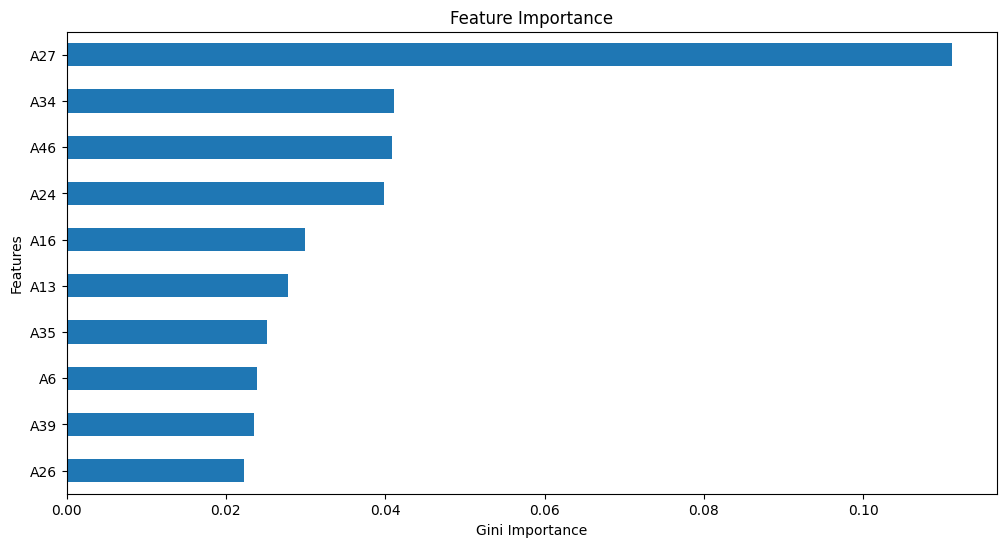

In [42]:
importance = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

features = X_train_over.columns

feat_imp = pd.Series(importance, index=features).sort_values()
plt.figure(figsize=(12, 6))
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Feature Importance')


# SAVE MODEL #

In [ ]:
pickle.dump(model, open('bankruptcyy.pkl', 'wb'))


*CREATING A FUNCTION FOR PREDICTION PARAMETERS*

In [ ]:
def make_predictions(data_filepath, model_filepath):
    # Read in your prediction data set
    X_test = pd.read_csv(data_filepath)
    # Load model model built for prediction
    with open('bankruptcyy.pkl', 'rb') as f:
        model = pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name='bankrupt')
    return y_test_pred


*PREDICTION PARAMETERS*

In [ ]:
y_test_pred = make_predictions(
    data_filepath="data/poland-bankruptcy-data-2009-mvp-features.json.gz",    # example of a test data set
    model_filepath="poland_prediction.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()


# INTERACTIVE DASHBOARD FOR PREDICTION #

In [ ]:
def make_cf_matrix(threshold):
    y_pred_proba = model.predict_proba(X_test)[:, -1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    profit = input('what is your profit: ')
    loses = input('what loses will we suffer: ')
    print(f'profit: ${tp*profit}')
    print(f'loses : ${fp*loses}')

thresh_widget = widgets.FloatSlider(min=0,max=1, value=0.5,step=0.05)

interact(make_cf_matrix, threshold=thresh_widget)
